# How successful are visa applications from Asian countries?

**Idea:** by Daniel Pelz

**Additional Research:** Rodion Ebbighausen

**Data Source:** German Foreign Office. Provided to German party "Die Linke" via several "Kleine Anfragen" and upon own request

**Provided Data Format:** PDF files

# Data cleaning

In [1]:
#loading all charting libraries and tools needed
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import dateutil.parser
import numpy as np
import seaborn as sns
import squarify
from statsmodels.graphics.mosaicplot import mosaic
import pylab
from itertools import product

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 30)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

First steps before reading in the data:
    - converted pdf files for each year into a csv file using Abbyy Fine Reader
    - cleaned csv files with Regular Expressions to make sure they are all formatted the same way

In [2]:
# Read in the csv file on visa applications from each year
# Add a column on what year they refer to
# Create one large table out of all of them

visa_applications = pd.DataFrame()

years_list = ['2014','2015', '2016', '2017']

for year in years_list:
    df = pd.read_csv("data/output/Visa-Antraege-"+year+".csv")
    df['year'] = year
    visa_applications = visa_applications.append(df)
    
visa_applications = visa_applications.reset_index()

In [3]:
visa_applications.head()

,index,Land,AV-Ort,Schengen gesamt erteilt,Schengen gesamt abgelehnt,Schengen gesamt zurückgezogen,Schengen gesamt bearbeitet,Schengen Ablehnungsquote,D gesamt erteilt,D gesamt abgelehnt,D gesamt zurückgezogen,D gesamt bearbeitet,D Ablehnungsquote,year
0,0,Afghanistan,Kabul,1367,1056,24,2447,43.15%,2245,155,19,2419,6.41%,2014
1,1,Ägypten,Kairo,25415,1811,98,27324,6.63%,3688,231,110,4029,5.73%,2014
2,2,Albanien,Tirana,43,1,1,45,2.22%,850,166,21,1037,16.01%,2014
3,3,Algerien,Algier,4489,1442,36,5967,24.17%,657,111,9,777,14.29%,2014
4,4,Angola,Luanda,1916,767,23,2706,28.34%,44,1,2,47,2.13%,2014


In [4]:
# checking what datatype Pandas thinks each column has
visa_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 14 columns):
index                            773 non-null int64
Land                             773 non-null object
AV-Ort                           701 non-null object
Schengen gesamt erteilt          773 non-null int64
Schengen gesamt abgelehnt        773 non-null int64
Schengen gesamt zurückgezogen    773 non-null int64
Schengen gesamt bearbeitet       773 non-null int64
Schengen Ablehnungsquote         773 non-null object
D gesamt erteilt                 773 non-null int64
D gesamt abgelehnt               773 non-null int64
D gesamt zurückgezogen           773 non-null int64
D gesamt bearbeitet              773 non-null int64
D Ablehnungsquote                773 non-null object
year                             773 non-null object
dtypes: int64(9), object(5)
memory usage: 84.6+ KB


In [5]:
# convert percentage strings to numbers

def delete_percentage_sign(string):
    try:
        number = string.strip("%")
        return float(number)
    except:
        pass

list_quota_columns = ['Schengen Ablehnungsquote','D Ablehnungsquote']

for column in list_quota_columns:
    column_name = column.replace(" ", "_") + "_percent"
    visa_applications[column_name] = visa_applications[column].apply(delete_percentage_sign)

In [6]:
#checking whether conversion worked correctly
visa_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 16 columns):
index                               773 non-null int64
Land                                773 non-null object
AV-Ort                              701 non-null object
Schengen gesamt erteilt             773 non-null int64
Schengen gesamt abgelehnt           773 non-null int64
Schengen gesamt zurückgezogen       773 non-null int64
Schengen gesamt bearbeitet          773 non-null int64
Schengen Ablehnungsquote            773 non-null object
D gesamt erteilt                    773 non-null int64
D gesamt abgelehnt                  773 non-null int64
D gesamt zurückgezogen              773 non-null int64
D gesamt bearbeitet                 773 non-null int64
D Ablehnungsquote                   773 non-null object
year                                773 non-null object
Schengen_Ablehnungsquote_percent    743 non-null float64
D_Ablehnungsquote_percent           771 non-null float64
dtypes

In [7]:
visa_applications.head()

,index,Land,AV-Ort,Schengen gesamt erteilt,Schengen gesamt abgelehnt,Schengen gesamt zurückgezogen,Schengen gesamt bearbeitet,Schengen Ablehnungsquote,D gesamt erteilt,D gesamt abgelehnt,D gesamt zurückgezogen,D gesamt bearbeitet,D Ablehnungsquote,year,Schengen_Ablehnungsquote_percent,D_Ablehnungsquote_percent
0,0,Afghanistan,Kabul,1367,1056,24,2447,43.15%,2245,155,19,2419,6.41%,2014,43.15,6.41
1,1,Ägypten,Kairo,25415,1811,98,27324,6.63%,3688,231,110,4029,5.73%,2014,6.63,5.73
2,2,Albanien,Tirana,43,1,1,45,2.22%,850,166,21,1037,16.01%,2014,2.22,16.01
3,3,Algerien,Algier,4489,1442,36,5967,24.17%,657,111,9,777,14.29%,2014,24.17,14.29
4,4,Angola,Luanda,1916,767,23,2706,28.34%,44,1,2,47,2.13%,2014,28.34,2.13


In [8]:
visa_applications.columns

Index(['index', 'Land', 'AV-Ort', 'Schengen gesamt erteilt',
       'Schengen gesamt abgelehnt', 'Schengen gesamt zurückgezogen',
       'Schengen gesamt bearbeitet', 'Schengen Ablehnungsquote',
       'D gesamt erteilt', 'D gesamt abgelehnt', 'D gesamt zurückgezogen',
       'D gesamt bearbeitet', 'D Ablehnungsquote', 'year',
       'Schengen_Ablehnungsquote_percent', 'D_Ablehnungsquote_percent'],
      dtype='object')

In [9]:
# # only keeping the cleaned-up columns
visa_applications = visa_applications[['index', 'year' ,'Land', 'AV-Ort','Schengen gesamt bearbeitet','Schengen gesamt zurückgezogen','Schengen gesamt erteilt', 'Schengen gesamt abgelehnt','Schengen_Ablehnungsquote_percent','D gesamt bearbeitet','D gesamt zurückgezogen','D gesamt erteilt','D gesamt abgelehnt','D_Ablehnungsquote_percent']]

# giving the columns English titles
visa_applications.columns = (['entry_index', 'year', 'country', 'local_branch', 'Schengen_processed_applications', 'Schengen_withdrawn_applications', 'Schengen_granted_applications', 'Schengen_rejected_applications', 'Schengen_share_rejected', 'GER_processed_applications', 'GER_withdrawn_applications', 'GER_granted_applications', 'GER_rejected_applications','GER_share_rejected'])

In [10]:
visa_applications.head(20)

,entry_index,year,country,local_branch,Schengen_processed_applications,Schengen_withdrawn_applications,Schengen_granted_applications,Schengen_rejected_applications,Schengen_share_rejected,GER_processed_applications,GER_withdrawn_applications,GER_granted_applications,GER_rejected_applications,GER_share_rejected
0,0,2014,Afghanistan,Kabul,2447,24,1367,1056,43.15,2419,19,2245,155,6.41
1,1,2014,Ägypten,Kairo,27324,98,25415,1811,6.63,4029,110,3688,231,5.73
2,2,2014,Albanien,Tirana,45,1,43,1,2.22,1037,21,850,166,16.01
3,3,2014,Algerien,Algier,5967,36,4489,1442,24.17,777,9,657,111,14.29
4,4,2014,Angola,Luanda,2706,23,1916,767,28.34,47,2,44,1,2.13
5,5,2014,Argentinien,Buenos Aires,174,6,166,2,1.15,830,20,781,29,3.49
6,6,2014,Armenien,Eriwan,13975,321,12374,1280,9.16,758,47,626,85,11.21
7,7,2014,Aserbaidschan,Baku,16331,30,15604,697,4.27,765,22,672,71,9.28
8,8,2014,Äthiopien,Addis Abeba,3731,53,2728,950,25.46,469,13,393,63,13.43
9,9,2014,Australien,Canberra,29,3,26,0,0.00,64,4,60,0,0.00


In [11]:
visa_applications.to_csv('data/output/visa_applications_2014to2017.csv')

Next steps: 
- Open exported file in OpenRefine and unify country and branch names
- Reload refined datasets

# Reading in cleaned data

In [12]:
visa_applications = pd.read_csv('data/output/visa_applications_2014to2017-refined.csv')

In [13]:
visa_applications.columns

Index(['Column', 'entry_index', 'year', 'country', 'local_branch',
       'Schengen_processed_applications', 'Schengen_withdrawn_applications',
       'Schengen_granted_applications', 'Schengen_rejected_applications',
       'Schengen_share_rejected', 'GER_processed_applications',
       'GER_withdrawn_applications', 'GER_granted_applications',
       'GER_rejected_applications', 'GER_share_rejected'],
      dtype='object')

In [14]:
visa_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 15 columns):
Column                             773 non-null int64
entry_index                        773 non-null int64
year                               773 non-null int64
country                            773 non-null object
local_branch                       701 non-null object
Schengen_processed_applications    773 non-null int64
Schengen_withdrawn_applications    773 non-null int64
Schengen_granted_applications      773 non-null int64
Schengen_rejected_applications     773 non-null int64
Schengen_share_rejected            754 non-null float64
GER_processed_applications         773 non-null int64
GER_withdrawn_applications         773 non-null int64
GER_granted_applications           773 non-null int64
GER_rejected_applications          773 non-null int64
GER_share_rejected                 773 non-null float64
dtypes: float64(2), int64(11), object(2)
memory usage: 90.7+ KB


In [15]:
visa_applications['year'] = [dateutil.parser.parse(str(value)).strftime('%Y') for value in visa_applications['year']]

In [16]:
visa_applications.head()

,Column,entry_index,year,country,local_branch,Schengen_processed_applications,Schengen_withdrawn_applications,Schengen_granted_applications,Schengen_rejected_applications,Schengen_share_rejected,GER_processed_applications,GER_withdrawn_applications,GER_granted_applications,GER_rejected_applications,GER_share_rejected
0,0,0,2014,Afghanistan,Kabul,2447,24,1367,1056,43.15,2419,19,2245,155,6.41
1,1,1,2014,Ägypten,Kairo,27324,98,25415,1811,6.63,4029,110,3688,231,5.73
2,2,2,2014,Albanien,Tirana,45,1,43,1,2.22,1037,21,850,166,16.01
3,3,3,2014,Algerien,Algier,5967,36,4489,1442,24.17,777,9,657,111,14.29
4,4,4,2014,Angola,Luanda,2706,23,1916,767,28.34,47,2,44,1,2.13


# Data inspection and preparation

## Data remodeling

In [17]:
visa_applications_schengen = visa_applications[['entry_index', 'year', 'country', 'local_branch',
       'Schengen_processed_applications', 'Schengen_withdrawn_applications','Schengen_granted_applications', 
       'Schengen_rejected_applications','Schengen_share_rejected']]

visa_applications_germany = visa_applications[['entry_index', 'year', 'country', 'local_branch',
       'GER_processed_applications','GER_withdrawn_applications', 'GER_granted_applications',
       'GER_rejected_applications', 'GER_share_rejected']]

In [18]:
visa_applications_schengen['applied_to'] = 'Schengen'
visa_applications_germany['applied_to'] = 'Germany'

visa_applications_schengen.columns = (['entry_index', 'year', 'country', 'local_branch','processed_applications','withdrawn_applications', 'granted_applications','rejected_applications', 'share_rejected', 'applied_to'])
visa_applications_germany.columns = (['entry_index', 'year', 'country', 'local_branch','processed_applications','withdrawn_applications', 'granted_applications','rejected_applications', 'share_rejected', 'applied_to'])

In [19]:
visa_applications_remodeled = visa_applications_schengen.append(visa_applications_germany)
visa_applications_remodeled = visa_applications_remodeled[['entry_index', 'year', 'country', 'local_branch','applied_to',
       'processed_applications', 'withdrawn_applications','granted_applications', 'rejected_applications', 'share_rejected']]

In [20]:
visa_applications_remodeled.head()

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected
0,0,2014,Afghanistan,Kabul,Schengen,2447,24,1367,1056,43.15
1,1,2014,Ägypten,Kairo,Schengen,27324,98,25415,1811,6.63
2,2,2014,Albanien,Tirana,Schengen,45,1,43,1,2.22
3,3,2014,Algerien,Algier,Schengen,5967,36,4489,1442,24.17
4,4,2014,Angola,Luanda,Schengen,2706,23,1916,767,28.34


## Getting rid of 'total' ('gesamt') duplicates

For countries with several branches, each office is listed separately. In addition the respective country has a total ('Gesamt') entry.
In order to not falsify results, these total figures are filtered out.

Additionally, country and local branch are fused into one name.

In [21]:
visa_applications_remodeled[visa_applications_remodeled['country'].str.contains('Gesamt')]

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected
11,11,2014,Gesamt Australien,NaN,Schengen,31,3,27,1,3.23
23,23,2014,Gesamt Brasilien,NaN,Schengen,371,29,318,24,6.47
32,32,2014,Gesamt China,NaN,Schengen,318394,515,304820,13059,4.10
47,47,2014,Gesamt Großbritannien,NaN,Schengen,28450,154,27627,669,2.35
56,56,2014,Gesamt Indien,NaN,Schengen,110176,184,101267,8725,7.92
60,60,2014,Gesamt Irak,NaN,Schengen,10710,118,10198,394,3.68
69,69,2014,Gesamt Japan,NaN,Schengen,1871,20,1842,9,0.48
76,76,2014,Gesamt Kanada,NaN,Schengen,2452,47,2384,21,0.86
79,79,2014,Gesamt Kasachstan,NaN,Schengen,42788,214,41838,736,1.72
116,116,2014,Gesamt Nigeria,NaN,Schengen,15470,150,11049,4271,27.61


In [22]:
va_singles = visa_applications_remodeled[~visa_applications_remodeled['country'].str.contains('Gesamt')] 
va_singles.head()

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected
0,0,2014,Afghanistan,Kabul,Schengen,2447,24,1367,1056,43.15
1,1,2014,Ägypten,Kairo,Schengen,27324,98,25415,1811,6.63
2,2,2014,Albanien,Tirana,Schengen,45,1,43,1,2.22
3,3,2014,Algerien,Algier,Schengen,5967,36,4489,1442,24.17
4,4,2014,Angola,Luanda,Schengen,2706,23,1916,767,28.34


In [23]:
va_singles['application_origin']  = va_singles['country'] + ' – ' + va_singles['local_branch']

In [24]:
len(visa_applications_remodeled)

1546

In [25]:
len(va_singles)

1394

## Getting rid of applications filed in an EU country

The dataset also contains applications filed in a country that is part of the EU/Schengen zone. Since EU citizens would not need to apply for a visum, it must be citizens of other nations.
For further analysis, EU countries are excluded.

In [26]:
world_countries = pd.read_csv('data/input/Welt_Laender.csv')
world_countries

,name,region
0,Belgien,EU
1,Bulgarien,EU
2,Tschechische Republik,EU
3,Dänemark,EU
4,Deutschland,EU
5,Estland,EU
6,Irland,EU
7,Griechenland,EU
8,Spanien,EU
9,Frankreich,EU


In [27]:
va_singles = va_singles.merge(world_countries, left_on='country', right_on = 'name')
va_singles.head()

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region
0,0,2014,Afghanistan,Kabul,Schengen,2447,24,1367,1056,43.15,Afghanistan – Kabul,Afghanistan,Asien
1,0,2015,Afghanistan,Kabul,Schengen,2251,28,1145,1078,47.89,Afghanistan – Kabul,Afghanistan,Asien
2,0,2016,Afghanistan,Kabul,Schengen,2730,41,1526,1163,42.60,Afghanistan – Kabul,Afghanistan,Asien
3,0,2017,Afghanistan,Kabul,Schengen,1079,20,586,473,43.84,Afghanistan – Kabul,Afghanistan,Asien
4,0,2014,Afghanistan,Kabul,Germany,2419,19,2245,155,6.41,Afghanistan – Kabul,Afghanistan,Asien


In [28]:
va_singles = va_singles[va_singles['region']!='EU']

In [29]:
len(va_singles)

1178

## Check on the way the Foreign Office calculates the 'share rejected'

It's interesting that the number of processed applications includes also withdrawn applications.

The AA computes the 'share rejected' by rejected/processed, so:

    rejected / (granted + rejected + withdrawn)
    
However, a withdrawn application cannot be rejected by the authorities, so it does not make sense to include these in  the calculation. A more intuitive way to compute the share of negative decitions would be:

    rejected / (granted + rejected)

Due to the computation performed by AA the rejection share is smaller as than it would be if you'd calculate it the more intuitive way.

Hence, we introduce a new variable 'decisions' that is calculated

    decisions = granted + rejected
   
and we calculate and further on use the rejected share calculated as

    share_negative = rejected / decisions

In [30]:
va_singles.head()

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region
0,0,2014,Afghanistan,Kabul,Schengen,2447,24,1367,1056,43.15,Afghanistan – Kabul,Afghanistan,Asien
1,0,2015,Afghanistan,Kabul,Schengen,2251,28,1145,1078,47.89,Afghanistan – Kabul,Afghanistan,Asien
2,0,2016,Afghanistan,Kabul,Schengen,2730,41,1526,1163,42.60,Afghanistan – Kabul,Afghanistan,Asien
3,0,2017,Afghanistan,Kabul,Schengen,1079,20,586,473,43.84,Afghanistan – Kabul,Afghanistan,Asien
4,0,2014,Afghanistan,Kabul,Germany,2419,19,2245,155,6.41,Afghanistan – Kabul,Afghanistan,Asien


In [31]:
va_singles['decisions'] = va_singles['granted_applications'] + va_singles['rejected_applications']
va_singles['share_negative'] = round(va_singles['rejected_applications']/va_singles['decisions']*100)

## How big is the difference between the two ways to calculate the share of rejected applications?

In [32]:
va_singles['pp_difference'] = va_singles['share_negative'] - va_singles['share_rejected']

**Read:** If pp_difference is a positive number, it means the Foreign office rejection rate is smaller than the intuitive one.
Whereas if it is a negative number, it means the Foreign office rejection rate is larger than the intuitive one.

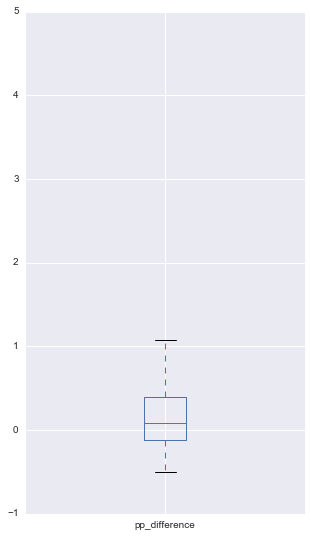

In [33]:
va_singles['pp_difference'].plot(kind = 'box', figsize = (5,9))

In [34]:
min_diff_schengen = va_singles[va_singles['applied_to']=='Schengen']['pp_difference'].min()
min_diff_schengen

-0.5

In [35]:
va_singles[(va_singles['applied_to']=='Schengen')&(va_singles['pp_difference']==min_diff_schengen)]

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region,decisions,share_negative,pp_difference
649,90,2015,Kuwait,Kuwait,Schengen,60272,60,58707,1505,2.5,Kuwait – Kuwait,Kuwait,Asien,60212,2.0,-0.5


In [36]:
max_diff_schengen = va_singles[va_singles['applied_to']=='Schengen']['pp_difference'].max()
max_diff_schengen

3.1799999999999997

In [37]:
va_singles[(va_singles['applied_to']=='Schengen')&(va_singles['pp_difference']==max_diff_schengen)]

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region,decisions,share_negative,pp_difference
619,86,2017,"Korea, DVR",Pjöngjang,Schengen,154,12,93,49,31.82,"Korea, DVR – Pjöngjang","Korea, DVR",Asien,142,35.0,3.18


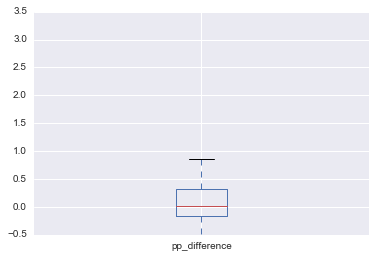

In [38]:
va_singles[va_singles['applied_to']=='Schengen']['pp_difference'].plot(kind='box')

In [39]:
min_diff_germany = va_singles[va_singles['applied_to']=='Germany']['pp_difference'].min()
min_diff_germany

-0.5

In [40]:
va_singles[va_singles['applied_to']=='Germany']['pp_difference'].mean()

0.23678023850085175

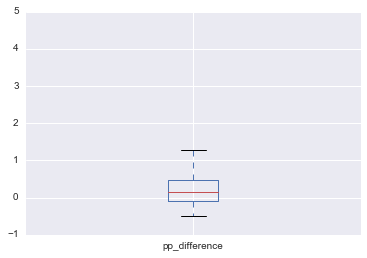

In [41]:
va_singles[va_singles['applied_to']=='Germany']['pp_difference'].plot(kind='box')

In [42]:
max_diff_germany = va_singles[va_singles['applied_to']=='Germany']['pp_difference'].max()
max_diff_germany

4.109999999999999

In [43]:
va_singles[(va_singles['applied_to']=='Germany')&(va_singles['pp_difference']==max_diff_germany)]

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region,decisions,share_negative,pp_difference
1399,191,2016,Zypern,Nikosia,Germany,45,6,26,13,28.89,Zypern – Nikosia,Zypern,Asien,39,33.0,4.11


**Read:** In the cases with the highest difference for both Schengen and Germany, it's related to countries with just very small numbers of applications. For the majority of countries it does not make a big difference at all

# Data analysis

## How has the absolute number of visa applications changed over time in Germany/Schengen?

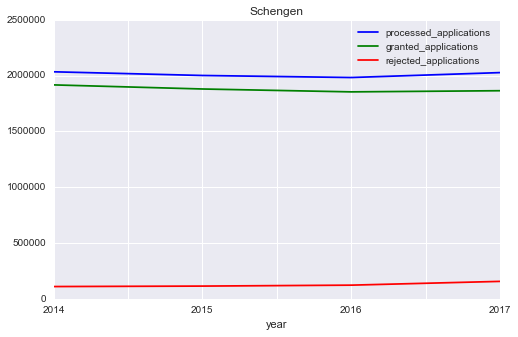

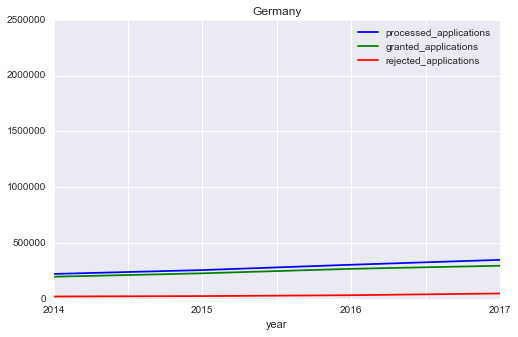

In [44]:
country_list = ['Schengen', 'Germany']

for country in country_list:
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set_title(country)
    va_singles[va_singles['applied_to']==country].groupby(by='year')['processed_applications'].sum().plot(ax = ax, ylim = (0,2500000), c='blue', legend = 'processed')
    va_singles[va_singles['applied_to']==country].groupby(by='year')['granted_applications'].sum().plot(ax = ax, ylim = (0,2500000), c='green', legend = 'granted')
    va_singles[va_singles['applied_to']==country].groupby(by='year')['rejected_applications'].sum().plot(ax = ax, ylim = (0,2500000), c='red', legend = 'rejected')

**Find:** Over time, the share of rejected applications was higher in Germany than in the Schengen Area.

In [45]:
va_singles_ger = va_singles[va_singles['applied_to'] == 'Germany']
va_singles_sch = va_singles[va_singles['applied_to'] == 'Schengen']

In [46]:
germany_totals = []

for year in years_list:
    year_dict = {}
    year_dict['year'] = year
    year_dict['granted'] = va_singles_ger[va_singles_ger['year']==year]['granted_applications'].sum()
    year_dict['rejected'] = va_singles_ger[va_singles_ger['year']==year]['rejected_applications'].sum()
    year_dict['decided'] = va_singles_ger[va_singles_ger['year']==year]['decisions'].sum()
    germany_totals.append(year_dict)

In [47]:
germany = pd.DataFrame(germany_totals)
germany['share_positive'] = germany['granted']/germany['decided']*100
germany['share_negative'] = germany['rejected']/germany['decided']*100
germany = germany[['year', 'decided', 'granted', 'rejected', 'share_positive', 'share_negative']]
germany

,year,decided,granted,rejected,share_positive,share_negative
0,2014,218381,197732,20649,90.544507,9.455493
1,2015,252789,228411,24378,90.356384,9.643616
2,2016,300768,268517,32251,89.277117,10.722883
3,2017,344010,296288,47722,86.127729,13.872271


In [48]:
ger_decisions = germany['decided'].sum()
ger_decisions

1115948

In [49]:
ger_granted = germany['granted'].sum()
ger_granted

990948

In [50]:
ger_rejected = germany['rejected'].sum()
ger_rejected

125000

In [51]:
int(round(ger_granted/ger_decisions*100))

89

In [52]:
int(round(ger_rejected/ger_decisions*100))

11

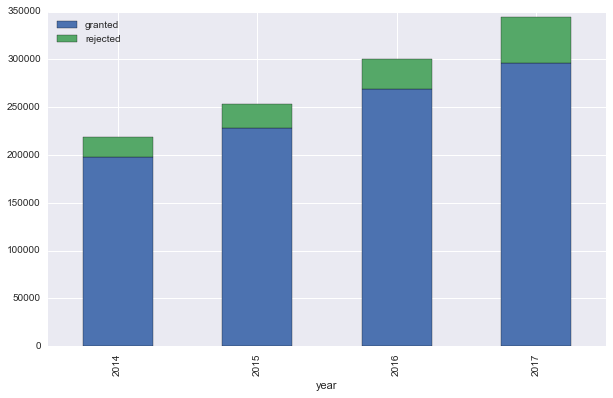

In [53]:
germany[['year','granted','rejected',]].plot(kind = 'bar', x = 'year', stacked = True, figsize = (10,6))

## Germany: What is the average rejection rate of visa applications from 2014 to 2017?

In [54]:
average_rejection_rate_ger = va_singles_ger['rejected_applications'].sum()/va_singles_ger['decisions'].sum()*100

print("On average, ",round(average_rejection_rate_ger) ," percent of visa applications between 2014 to 2017 got rejected by German authorities. Or:",round(average_rejection_rate_ger),"out of 100 applications were rejected between 2014 and 2017")

On average,  11.0  percent of visa applications between 2014 to 2017 got rejected by German authorities. Or: 11.0 out of 100 applications were rejected between 2014 and 2017


## Germany: Is the share of rejected applications higher in countries where many applications have been filed? (2014 to 2017)

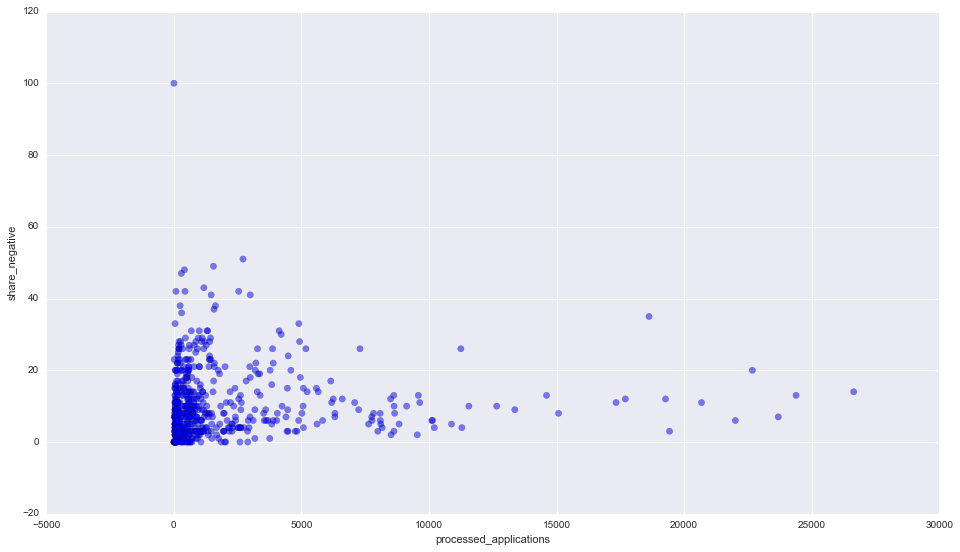

In [55]:
colors = {'Afrika':'blue', 'Europa':'blue', 'Asien':'blue', 'Nordamerika':'blue', 'Lateinamerika':'blue', 'Ozeanien':'blue'}

va_singles_ger.plot(kind = 'scatter', x = 'processed_applications', y = 'share_negative',s=40, c=va_singles['region'].apply(lambda x:colors[x]), figsize = (16,9), alpha=.5)

In [56]:
r = va_singles_ger.corr()['processed_applications']['share_negative']
r

0.04503470633374586

**Pearson's r** is a measure for whether or not there is a linear correlation between two variables like the (A) expenditure on education and (B) the primary enrollment. It can have a value between 1 and -1. If it's close to the former or the latter it means it has a strong positive (= if variable A increases, variable B increases too) or negative (= if variable A increases, variable B decreases) correlation. If the value for r is - as it is in our case - closer to zero, it means the two variables A and B are probably not correlated.

**Read**: Whether or not an application is rejected is not related to how many applications have been proccessed overall at a certain office

## Adding up all years

In [57]:
countries_list = []

for country in va_singles_ger['country']:
    countries_list.append(country)
    
all_countries = set(countries_list)

In [58]:
va_singles_ger_sums = []

for country in all_countries:
    country_total = {}
    country_total['country'] = country
    country_total['region'] = str(va_singles_ger[va_singles_ger['country'] == country]['region'].unique()).replace("['","").replace("']","")
    country_total['processed'] = va_singles_ger[va_singles_ger['country'] == country]['processed_applications'].sum()
    country_total['granted'] = va_singles_ger[va_singles_ger['country'] == country]['granted_applications'].sum()
    country_total['rejected'] = va_singles_ger[va_singles_ger['country'] == country]['rejected_applications'].sum()
    va_singles_ger_sums.append(country_total)

In [59]:
va_singles_ger_sum = pd.DataFrame(va_singles_ger_sums)
va_singles_ger_sum['decided'] = va_singles_ger_sum['rejected'] + va_singles_ger_sum['granted']
va_singles_ger_sum['share_rejected'] = (va_singles_ger_sum['rejected']/va_singles_ger_sum['processed'])*100
va_singles_ger_sum['share_negative'] = (va_singles_ger_sum['rejected']/va_singles_ger_sum['decided'])*100
va_singles_ger_sum['pp_difference'] = va_singles_ger_sum['share_negative']-va_singles_ger_sum['share_rejected']
va_singles_ger_sum['GER_decisions'] = va_singles_ger_sum['decided'].sum()
va_singles_ger_sum['share_total'] = (va_singles_ger_sum['decided']/va_singles_ger_sum['GER_decisions'])*100
va_singles_ger_sum = va_singles_ger_sum[['country','region','processed', 'decided', 'GER_decisions','share_total','granted', 'rejected','share_rejected', 'share_negative', 'pp_difference']]

va_singles_ger_sum.sort_values(by='share_negative', ascending = False)

,country,region,processed,decided,GER_decisions,share_total,granted,rejected,share_rejected,share_negative,pp_difference
80,Kamerun,Afrika,9700,9637,1115948,0.863571,5373,4264,43.958763,44.246135,0.287372
53,Kuwait,Asien,1380,1325,1115948,0.118733,740,585,42.391304,44.150943,1.759639
103,Kosovo,Europa,38940,38404,1115948,3.441379,27173,11231,28.841808,29.244350,0.402542
36,Côte d'Ivoire,Afrika,896,886,1115948,0.079394,627,259,28.906250,29.232506,0.326256
39,Ghana,Afrika,3850,3723,1115948,0.333618,2663,1060,27.532468,28.471663,0.939195
105,Bangladesch,Asien,4090,4037,1115948,0.361755,2944,1093,26.723716,27.074560,0.350844
82,Saudi-Arabien,Asien,6399,6174,1115948,0.553252,4511,1663,25.988436,26.935536,0.947100
56,Tunesien,Afrika,18835,18564,1115948,1.663518,13677,4887,25.946376,26.325145,0.378769
0,Guinea,Afrika,986,963,1115948,0.086294,710,253,25.659229,26.272066,0.612837
91,Marokko,Afrika,15162,15064,1115948,1.349884,11119,3945,26.018995,26.188263,0.169269


## Germany: How does the share of rejected applications between 2014 and 2017 differ among different countries?

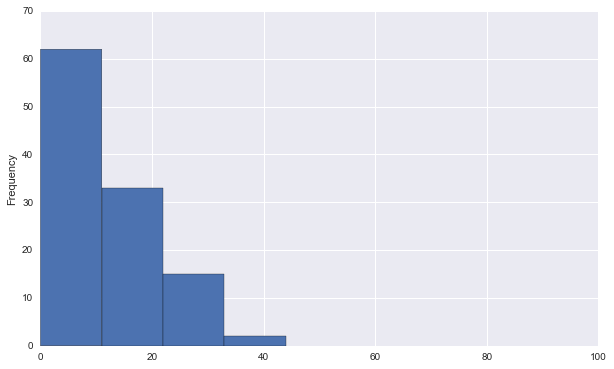

In [60]:
va_singles_ger_sum['share_rejected'].plot(kind = 'hist',bins = 4, figsize = (10,6), xlim=(0,100))

Read:
- For around 60 countries, the rejection rate is between 0 and 10 percent
- For around 32 countries, the rejection rate is between 10 and 20 percent
- For around 15 countries, the rejection rate is between 20 and 30 percent

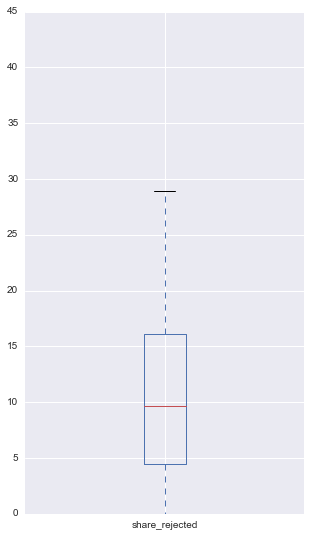

In [61]:
va_singles_ger_sum['share_rejected'].plot(kind = 'box', figsize = (5,9))

In [62]:
median_ger = va_singles_ger_sum['share_rejected'].median()
print('Half of all countries (across all years) have a rejection rate of', median_ger, 'percent or lower/higher')

Half of all countries (across all years) have a rejection rate of 9.627941243360857 percent or lower/higher


In [63]:
third_quartile = va_singles_ger_sum['share_rejected'].quantile(q=0.75)
print('Three quarter of all countries (and all years) have a rejection rate of',third_quartile ,'percent or lower')

Three quarter of all countries (and all years) have a rejection rate of 16.116504641264097 percent or lower


In [64]:
first_quartile = va_singles_ger_sum['share_rejected'].quantile(q=0.25)
print('One quarter of all countries (and all years) have a rejection rate of',first_quartile ,'percent or lower')

One quarter of all countries (and all years) have a rejection rate of 4.46820486422874 percent or lower


In [65]:
iqr = va_singles_ger_sum['share_rejected'].quantile(q=0.75) - va_singles_ger_sum['share_rejected'].quantile(q=0.25)

In [66]:
upper_acceptance_limit = va_singles_ger_sum['share_rejected'].quantile(q=0.75) + (iqr * 1.5)
print("Countries with a rejection rate of more than", upper_acceptance_limit, "percent would qualify as statistically significant outliers. This applies to the following countries:")

Countries with a rejection rate of more than 33.58895430681713 percent would qualify as statistically significant outliers. This applies to the following countries:


In [67]:
va_singles_ger_sum[va_singles_ger_sum['share_rejected'] >= upper_acceptance_limit]

,country,region,processed,decided,GER_decisions,share_total,granted,rejected,share_rejected,share_negative,pp_difference
53,Kuwait,Asien,1380,1325,1115948,0.118733,740,585,42.391304,44.150943,1.759639
80,Kamerun,Afrika,9700,9637,1115948,0.863571,5373,4264,43.958763,44.246135,0.287372


## Germany: Of all visa application between 2014 and 2017, what share is from which continent?

In [68]:
region_list = ['Afrika', 'Asien', 'Europa', 'Lateinamerika', 'Nordamerika', 'Ozeanien']

regional_va = []
    
for region in region_list:
    region_dict = {}
    region_dict['region'] = region
    region_dict['decided'] = va_singles_ger_sum[va_singles_ger_sum['region']==region]['decided'].sum()
    region_dict['granted'] = va_singles_ger_sum[va_singles_ger_sum['region']==region]['granted'].sum()
    region_dict['rejected'] = va_singles_ger_sum[va_singles_ger_sum['region']==region]['rejected'].sum()
    regional_va.append(region_dict)

In [69]:
regional_df = pd.DataFrame(regional_va)
regional_df

,decided,granted,region,rejected
0,106028,82929,Afrika,23099
1,671774,607865,Asien,63909
2,259011,224468,Europa,34543
3,63067,59925,Lateinamerika,3142
4,13179,12925,Nordamerika,254
5,2889,2836,Ozeanien,53


In [70]:
regional_df = pd.DataFrame(regional_va)
regional_df['overall_decisions_GER'] = va_singles_ger_sum['decided'].sum()
regional_df['share_of_total'] = (regional_df['decided']/regional_df['overall_decisions_GER'])*100
regional_df['share_of_total_rounded'] = [int(value) for value in round(regional_df['share_of_total'])]
regional_df['share_negative'] = (regional_df['rejected']/regional_df['decided'])*100
regional_df['share_negative_rounded'] = [int(value) for value in round(regional_df['share_negative'])]
regional_df['overall_rejected_GER'] =  va_singles_ger_sum['rejected'].sum()
regional_df['share_total_negative'] = regional_df['rejected']/regional_df['overall_rejected_GER']*100
regional_df['share_total_negative_rounded'] = [int(value) for value in round(regional_df['share_total_negative'])]
regional_df = regional_df[['region','decided','overall_decisions_GER', 'share_of_total','share_of_total_rounded', 'granted', 'rejected','share_negative','share_negative_rounded','overall_rejected_GER','share_total_negative', 'share_total_negative_rounded']]
regional_df.sort_values(by = 'share_of_total', ascending = False)

,region,decided,overall_decisions_GER,share_of_total,share_of_total_rounded,granted,rejected,share_negative,share_negative_rounded,overall_rejected_GER,share_total_negative,share_total_negative_rounded
1,Asien,671774,1115948,60.197608,60,607865,63909,9.513467,10,125000,51.1272,51
2,Europa,259011,1115948,23.209952,23,224468,34543,13.336499,13,125000,27.6344,28
0,Afrika,106028,1115948,9.501160,10,82929,23099,21.785755,22,125000,18.4792,18
3,Lateinamerika,63067,1115948,5.651428,6,59925,3142,4.982003,5,125000,2.5136,3
4,Nordamerika,13179,1115948,1.180969,1,12925,254,1.927309,2,125000,0.2032,0
5,Ozeanien,2889,1115948,0.258883,0,2836,53,1.834545,2,125000,0.0424,0


In [71]:
regional_df.to_csv('editorial-team-info/Visa-Applications-byContinent-sum2014to2017.csv', encoding = 'utf-8')

**Read**: 

Applications from Asia accounted for the largest share of applications being made to Germany between 2014 and 2017: 
        - 60 percent of all applications decided upon were filed in Asia,
        - 23 percent were filed a European (non EU) countries
        - 10 percent were filed in Africa

Looking at how these applications were decided upon, Africa leads the field:
        - 22 percent of applications filed in Africa were rejected (every fifth application)
        - 13 percent of applications filed in Europe were rejected (every eigth application)
        - 10 percent of applications filed in Asia were rejected (every tenth application)

For reference: The average rejection rate for applications to Germany is 11 percent.

**Find**: An application from Africa is twice as likely to be rejected than an application from an Asian country for example.

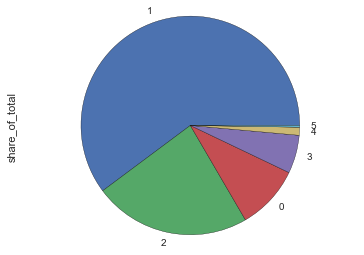

In [72]:
regional_df['share_of_total'].sort_values(ascending = False).plot(kind = 'pie', x = 'region')
plt.axis('equal')
plt.savefig('visuals/drafts/pie-applications.pdf', transparent = True)

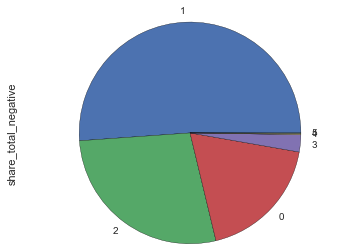

In [73]:
regional_df['share_total_negative'].sort_values(ascending = False).plot(kind = 'pie', x = 'region')
plt.axis('equal')
plt.savefig('visuals/drafts/pie-rejections.pdf', transparent = True)

In [74]:
possible_decisions = ['granted', 'rejected']

mosaic_world = pd.DataFrame()

for decision_type in possible_decisions:
    temp = regional_df[['region', decision_type]]
    temp['decision'] = decision_type
    temp=temp[['region', 'decision', decision_type]]
    temp.columns = (['region', 'decision', 'value'])
    mosaic_world = mosaic_world.append(temp)

In [75]:
mosaic_world.sort_values(['region', 'decision'], ascending = [True, True], inplace = True)
mosaic_world = mosaic_world.reset_index()
mosaic_world = mosaic_world[['region', 'decision', 'value']]
mosaic_world

,region,decision,value
0,Afrika,granted,82929
1,Afrika,rejected,23099
2,Asien,granted,607865
3,Asien,rejected,63909
4,Europa,granted,224468
5,Europa,rejected,34543
6,Lateinamerika,granted,59925
7,Lateinamerika,rejected,3142
8,Nordamerika,granted,12925
9,Nordamerika,rejected,254


In [76]:
mosaic_regions_list = []

for region in mosaic_world['region']:
    mosaic_regions_list.append(region)
    
mosaic_world_list = set(mosaic_regions_list)
sorted(mosaic_world_list)

['Afrika', 'Asien', 'Europa', 'Lateinamerika', 'Nordamerika', 'Ozeanien']

In [77]:
continent_applications = list(product(sorted(mosaic_world_list), ['granted', 'rejected']))

continent_index = pd.MultiIndex.from_tuples(continent_applications, names=['place', 'decision'])

continent_series = pd.Series([float(value) for value in mosaic_world['value']], index = continent_index)
continent_series

place          decision
Afrika         granted      82929.0
               rejected     23099.0
Asien          granted     607865.0
               rejected     63909.0
Europa         granted     224468.0
               rejected     34543.0
Lateinamerika  granted      59925.0
               rejected      3142.0
Nordamerika    granted      12925.0
               rejected       254.0
Ozeanien       granted       2836.0
               rejected        53.0
dtype: float64

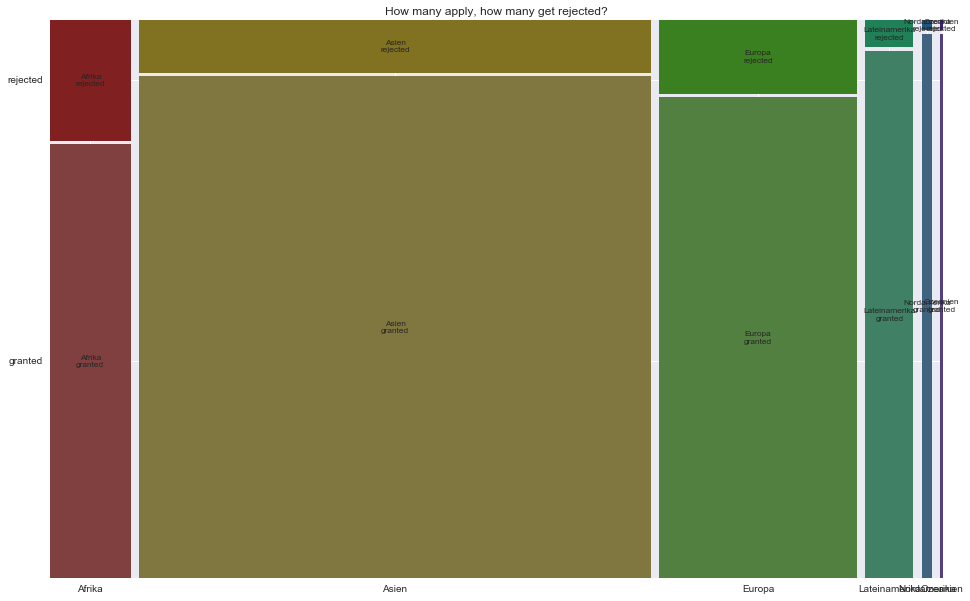

In [78]:
fig, ax = plt.subplots(figsize = (16,10))

mosaic(continent_series, gap=0.01, title='How many apply, how many get rejected?', ax = ax)
plt.savefig('visuals/drafts/marimekko-continents.pdf', transparent = True)
plt.show()

## Germany, single year: How do national rejection rates compare to other countries' from the same continent?

In [79]:
va_singles_ger_sum.sort_values(by = 'share_negative',ascending = False).head(10)

,country,region,processed,decided,GER_decisions,share_total,granted,rejected,share_rejected,share_negative,pp_difference
80,Kamerun,Afrika,9700,9637,1115948,0.863571,5373,4264,43.958763,44.246135,0.287372
53,Kuwait,Asien,1380,1325,1115948,0.118733,740,585,42.391304,44.150943,1.759639
103,Kosovo,Europa,38940,38404,1115948,3.441379,27173,11231,28.841808,29.244350,0.402542
36,Côte d'Ivoire,Afrika,896,886,1115948,0.079394,627,259,28.906250,29.232506,0.326256
39,Ghana,Afrika,3850,3723,1115948,0.333618,2663,1060,27.532468,28.471663,0.939195
105,Bangladesch,Asien,4090,4037,1115948,0.361755,2944,1093,26.723716,27.074560,0.350844
82,Saudi-Arabien,Asien,6399,6174,1115948,0.553252,4511,1663,25.988436,26.935536,0.947100
56,Tunesien,Afrika,18835,18564,1115948,1.663518,13677,4887,25.946376,26.325145,0.378769
0,Guinea,Afrika,986,963,1115948,0.086294,710,253,25.659229,26.272066,0.612837
91,Marokko,Afrika,15162,15064,1115948,1.349884,11119,3945,26.018995,26.188263,0.169269


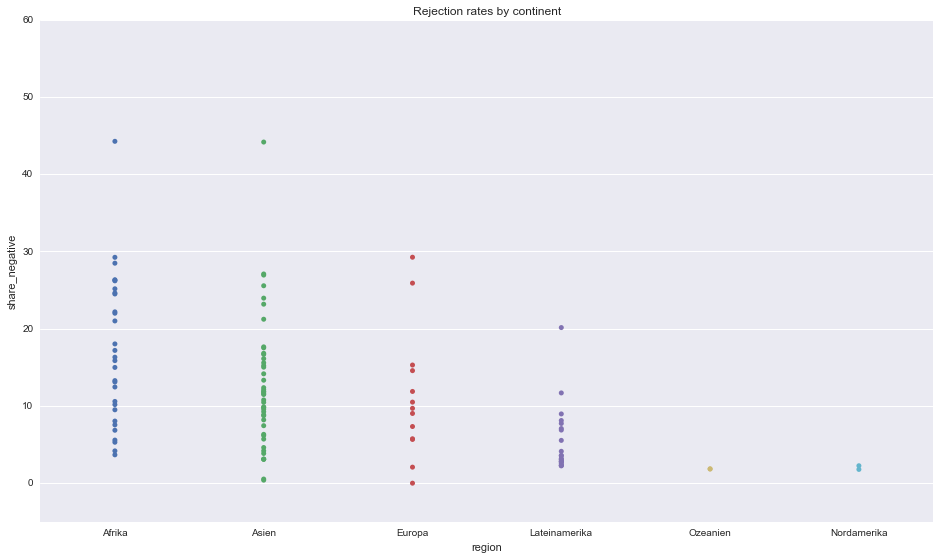

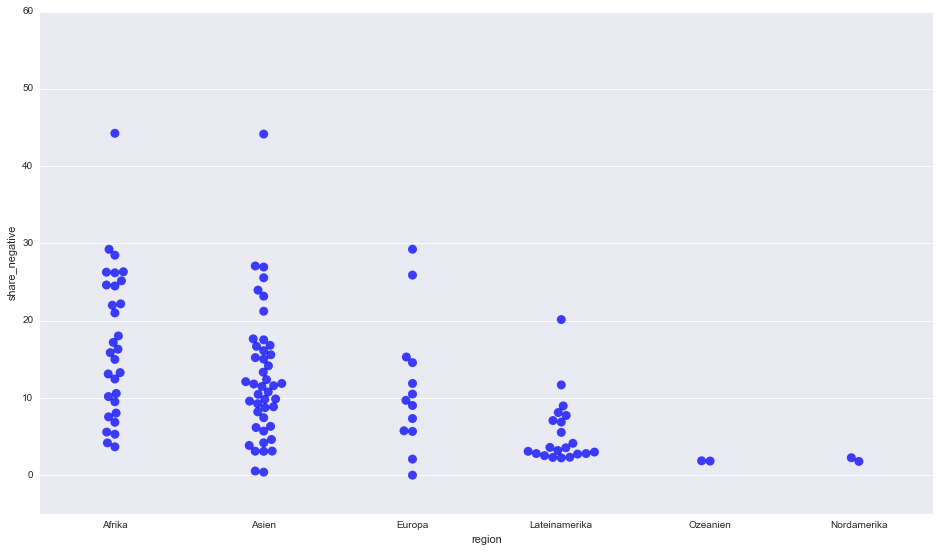

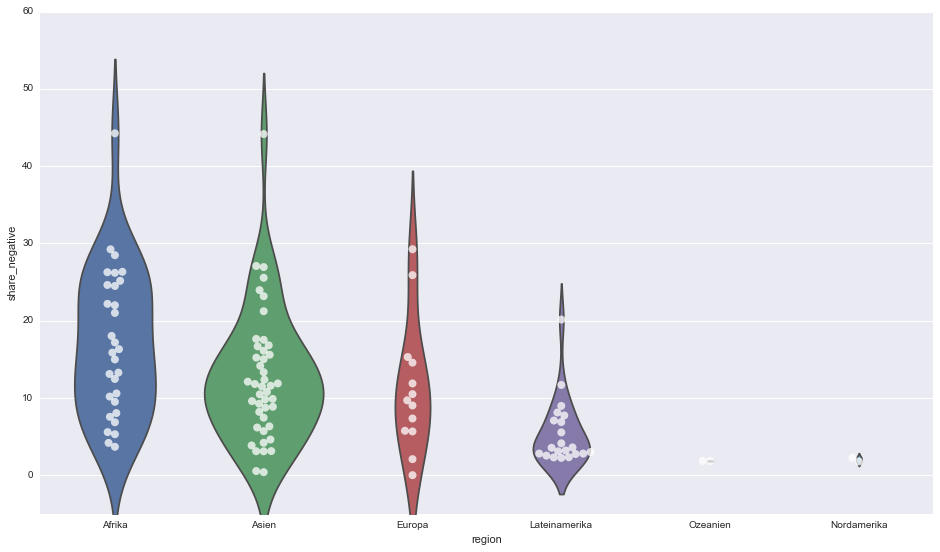

In [80]:
data_selection = va_singles_ger_sum

#stripplot

fig, ax = plt.subplots(figsize = (16,9))
ax.set_ylim(-5,60)
ax.set_title('Rejection rates by continent')

sns.stripplot(ax = ax, x="region", y="share_negative", data=data_selection)

#swarmplot
fig, ax = plt.subplots(figsize = (16,9))
ax.set_ylim(-5,60)

# colors = {'Afrika':'red', 'Europa':'blue', 'Asien':'blue', 'Nordamerika':'blue', 'Lateinamerika':'blue', 'Ozeanien':'blue'}

# va_singles_ger.plot(kind = 'scatter', x = 'processed_applications', y = 'share_negative',s=40, c=va_singles['region'].apply(lambda x:colors[x]), figsize = (16,9), alpha=.5)

sns.swarmplot(x="region", y="share_negative", data=data_selection, color="blue", alpha=.75, s=9)
plt.savefig('visuals/drafts/distribution-swarm.pdf', transparent = True)


#violinplot with swarmplot
fig, ax = plt.subplots(figsize = (16,9))
ax.set_ylim(-5,60)

sns.violinplot(ax=ax,x="region", y="share_negative", scale="count", data=data_selection, inner = None)
sns.swarmplot(x="region", y="share_negative", data=data_selection, color="w", alpha=.75, s=8)
# plt.savefig('visuals/drafts/distribution-violin.pdf', transparent = True)

# Below: Macro-analysis for selected continent

In [81]:
selected_continent = 'Asien'

## Germany: How has the number of applications evolved over time in each county for different  countries of the selected continent?

In [82]:
places_list = []
for place in va_singles_ger_sum['country']:
    places_list.append(place)

In [83]:
places = set(places_list)

In [84]:
selected_continent_list = []

for country in va_singles_ger[va_singles_ger['region'] ==selected_continent]['application_origin']:
    selected_continent_list.append(country)

In [85]:
continent_countries = set(selected_continent_list)

In [86]:
sample_df = va_singles_ger[va_singles_ger['region'] ==selected_continent]
ordered_names = sample_df.groupby("application_origin")['decisions'].last().sort_values(ascending=False).index
ordered_names = ordered_names.tolist()
ordered_names

['Türkei – Istanbul',
 'Libanon – Beirut',
 'Türkei – Ankara',
 'China – Peking',
 'Indien – Bangalore',
 'China – Shanghai',
 'Irak – Erbil',
 'Türkei – Izmir',
 'Indien – Chennai',
 'Indien – Mumbai',
 'Iran – Teheran',
 'Indien – New Delhi',
 'Jordanien – Amman',
 'Thailand – Bangkok',
 'Indonesien – Jakarta',
 'Vietnam – Hanoi',
 'Pakistan – Islamabad',
 'Korea – Seoul',
 'Kasachstan – Astana',
 'Philippinen – Manila',
 'China – Kanton',
 'Taiwan – Taipei',
 'Georgien – Tiflis',
 'China – Chengdu',
 'Afghanistan – Kabul',
 'Nepal – Kathmandu',
 'China – Shenyang',
 'VAE – Dubai',
 'Saudi-Arabien – Riad',
 'Vietnam – Ho-Chi-Minh-Stadt',
 'Singapur – Singapur',
 'Kasachstan – Almaty',
 'Malaysia – Kuala Lumpur',
 'Indien – Kalkutta',
 'Bangladesch – Dhaka',
 'Aserbaidschan – Baku',
 'China – Hongkong',
 'Palästinensische Gebiete – Ramallah',
 'Pakistan – Karachi',
 'Armenien – Eriwan',
 'Kirgisistan – Bischkek',
 'Japan – Tokyo',
 'Sri Lanka – Colombo',
 'Usbekistan – Taschkent',
 'M

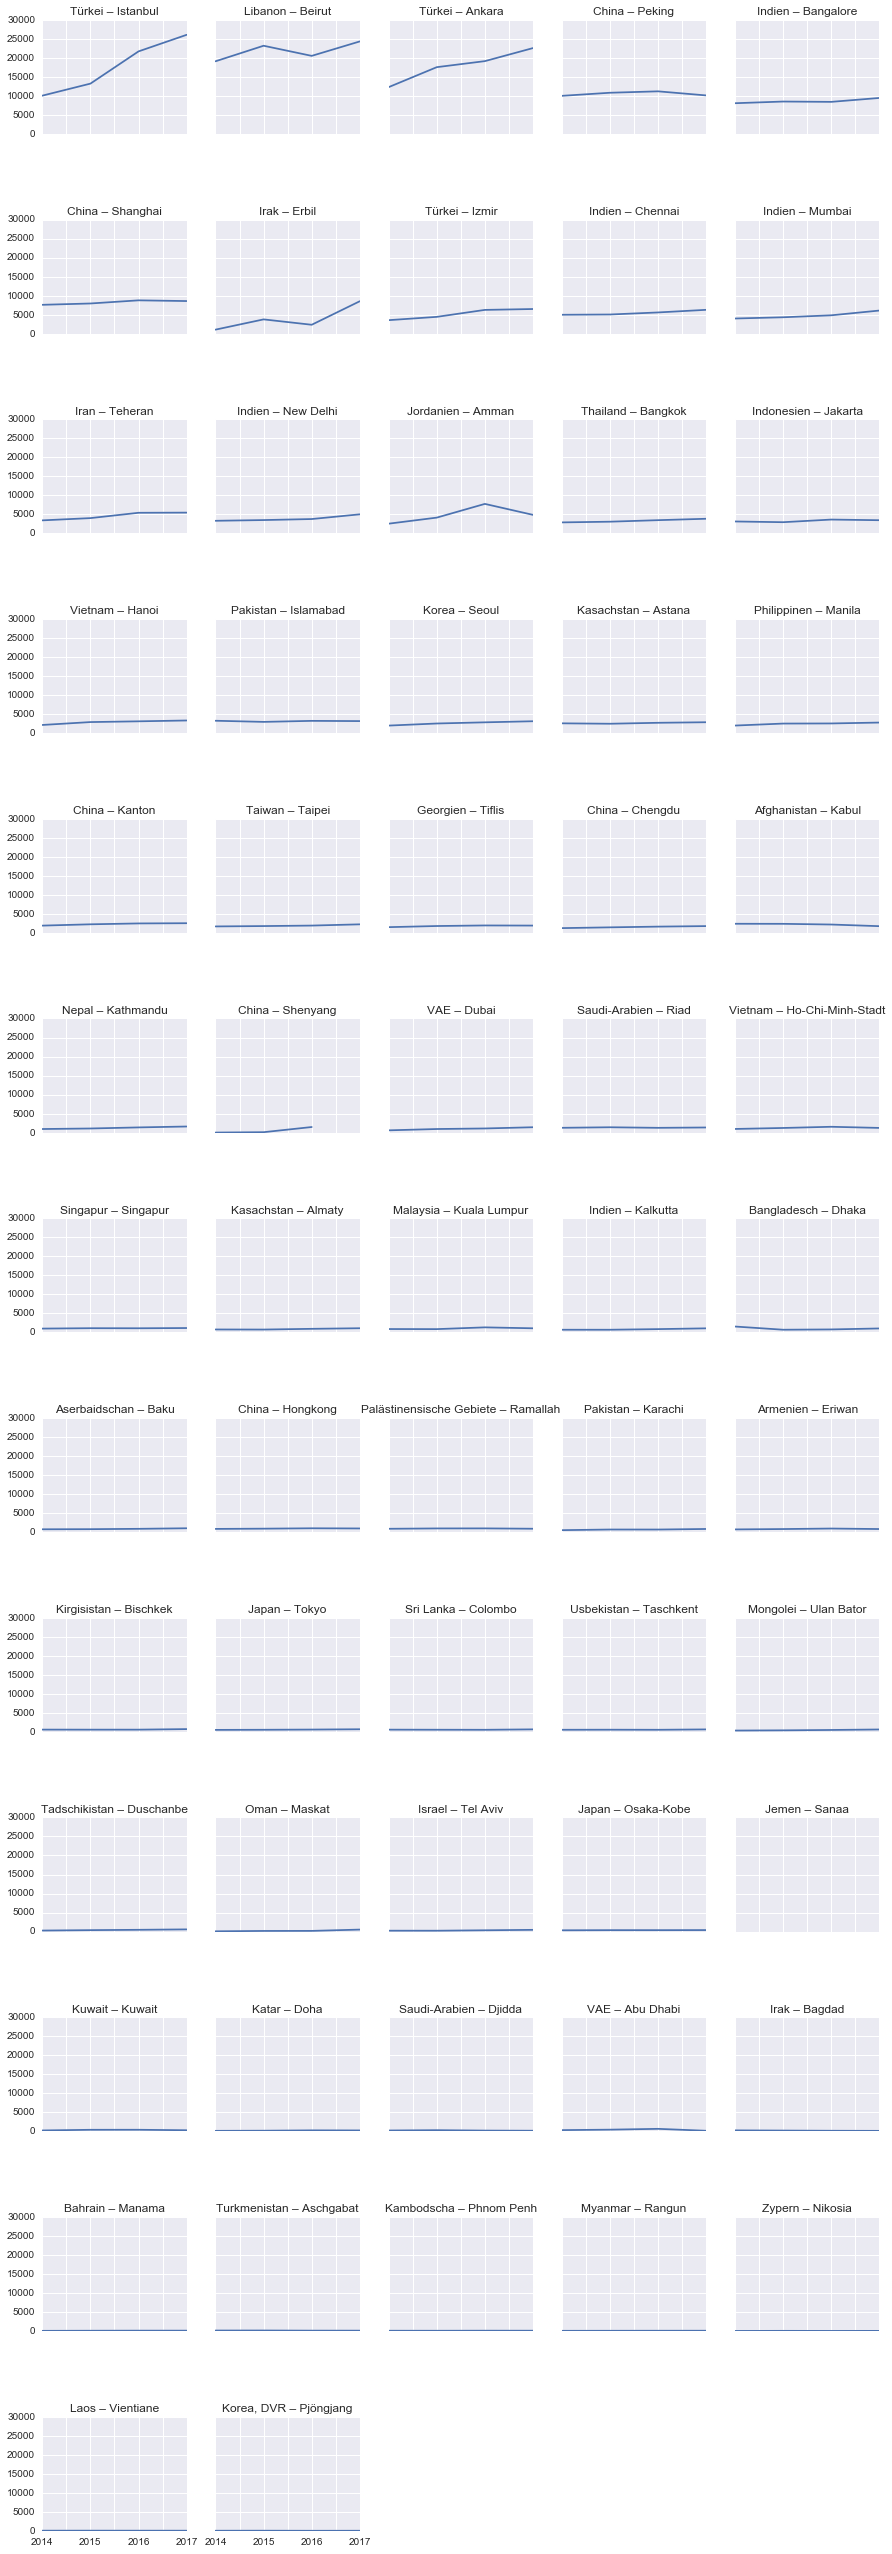

In [87]:
df = va_singles_ger.copy()
fig, axes = plt.subplots(nrows=13, ncols=5, sharex=True, sharey=True, figsize=(15,45))
axes_list = [item for sublist in axes for item in sublist]

subset_df = df[df['application_origin'].isin(selected_continent_list)]

grouped = subset_df.groupby("application_origin")

ordered_country_names = ordered_names

for countryname in ordered_country_names:
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='year', y='decisions', label = countryname, ax=ax, legend = False)
    ax.set_title(countryname)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    
for ax in axes_list:
    ax.remove()
    
    ax.set_title('Number of visa applications by office over time (2014-2017)')
    
plt.savefig('editorial-team-info/'+selected_continent+'-Visa-Applications-TimeSeries.pdf', transparent = True)    
    
plt.subplots_adjust(hspace=0.75)

## Germany: How has the rejection rate evolved over time for different countries from the selected continent?

In [88]:
sample_df2 = va_singles_ger[va_singles_ger['region'] ==selected_continent]
ordered_names2 = sample_df2.groupby("application_origin")['share_rejected'].last().sort_values(ascending=False).index
ordered_names2 = ordered_names2.tolist()
ordered_names2

['Kuwait – Kuwait',
 'Nepal – Kathmandu',
 'Saudi-Arabien – Riad',
 'Palästinensische Gebiete – Ramallah',
 'Korea, DVR – Pjöngjang',
 'Sri Lanka – Colombo',
 'VAE – Dubai',
 'Pakistan – Islamabad',
 'Türkei – Ankara',
 'Vietnam – Hanoi',
 'Katar – Doha',
 'Bahrain – Manama',
 'Afghanistan – Kabul',
 'Jordanien – Amman',
 'Philippinen – Manila',
 'Jemen – Sanaa',
 'Iran – Teheran',
 'Aserbaidschan – Baku',
 'Kambodscha – Phnom Penh',
 'Mongolei – Ulan Bator',
 'Turkmenistan – Aschgabat',
 'Kirgisistan – Bischkek',
 'Türkei – Istanbul',
 'Libanon – Beirut',
 'Saudi-Arabien – Djidda',
 'Irak – Erbil',
 'Israel – Tel Aviv',
 'Irak – Bagdad',
 'Türkei – Izmir',
 'Bangladesch – Dhaka',
 'Indien – Mumbai',
 'Indien – New Delhi',
 'Vietnam – Ho-Chi-Minh-Stadt',
 'Usbekistan – Taschkent',
 'Taiwan – Taipei',
 'Malaysia – Kuala Lumpur',
 'Armenien – Eriwan',
 'Indonesien – Jakarta',
 'Georgien – Tiflis',
 'China – Shanghai',
 'Indien – Chennai',
 'VAE – Abu Dhabi',
 'Laos – Vientiane',
 'Pakist

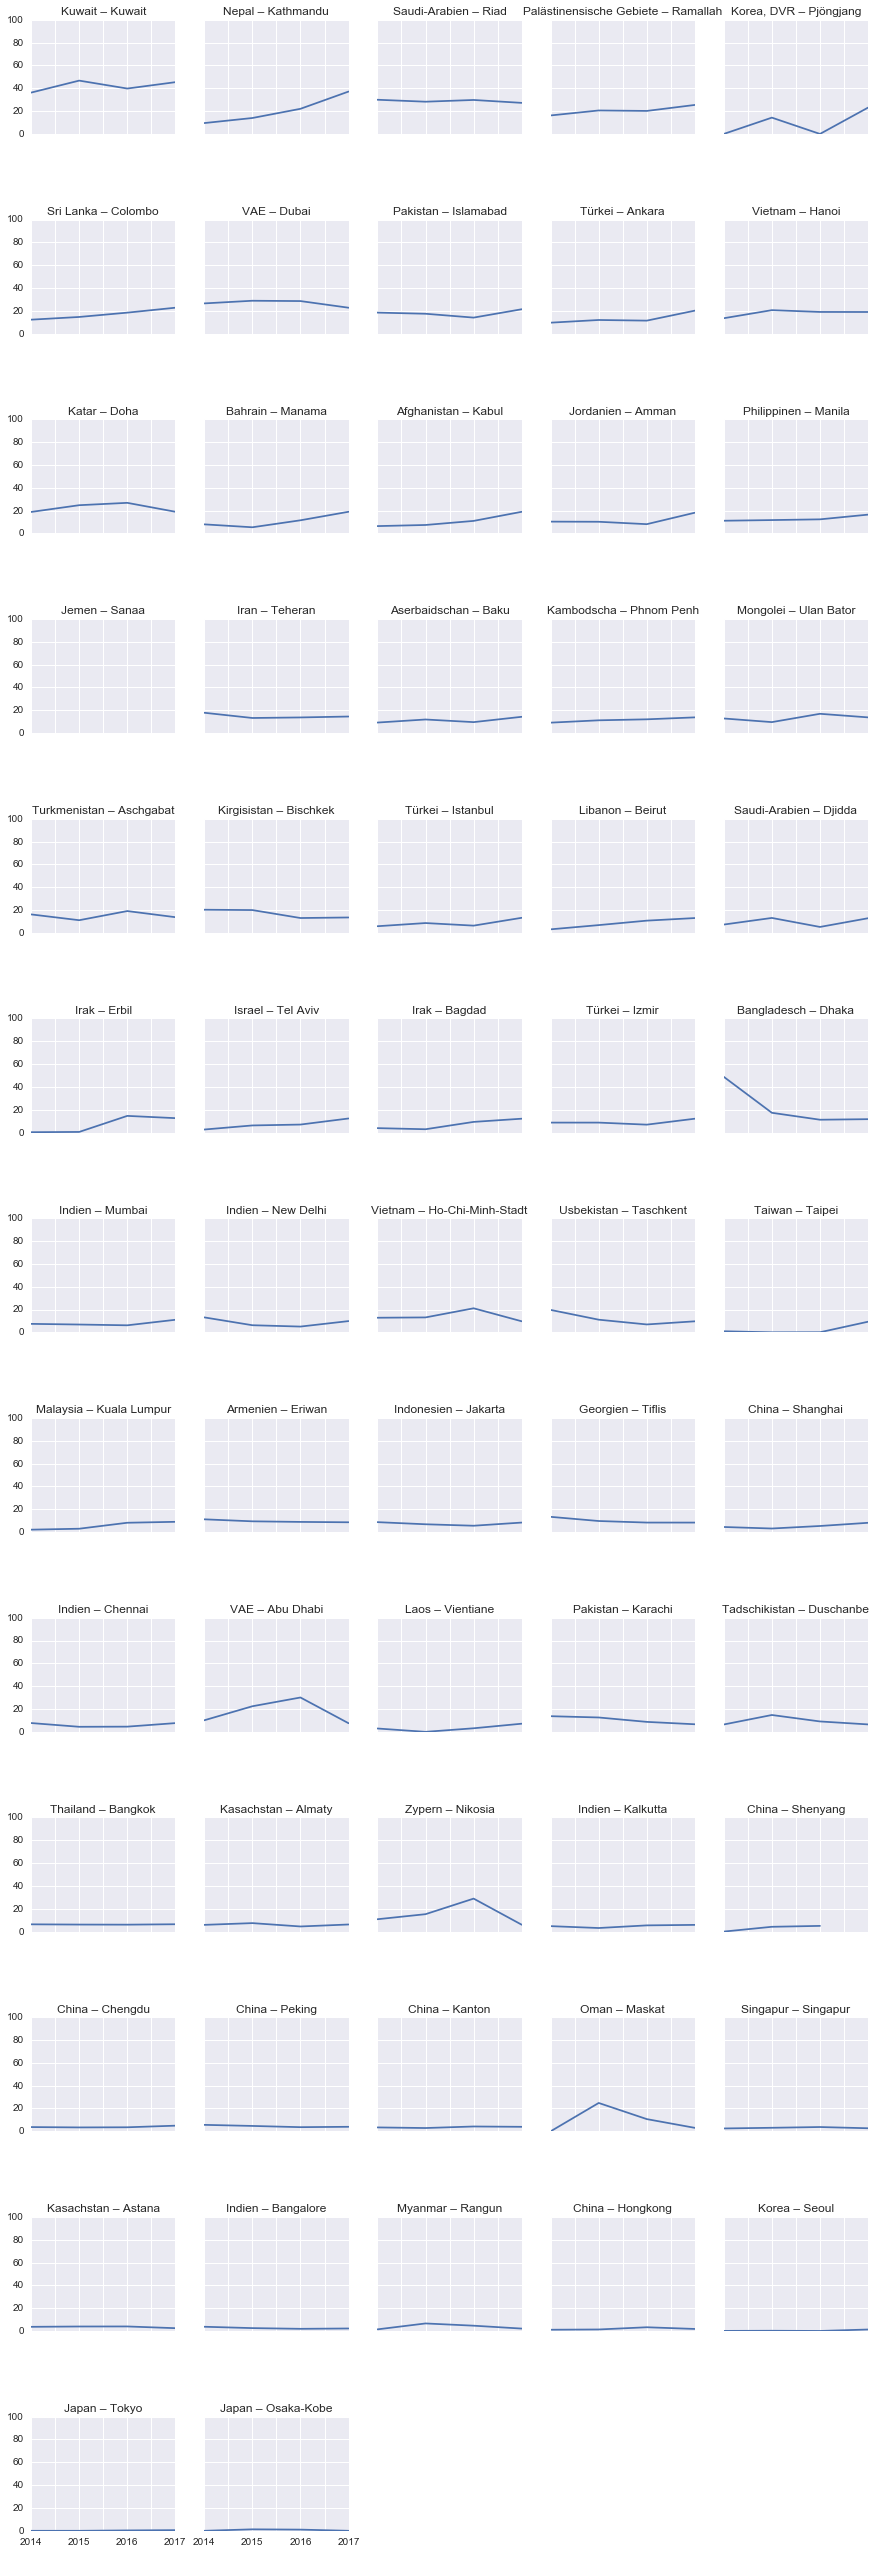

In [89]:
df = va_singles_ger.copy()
fig, axes = plt.subplots(nrows=13, ncols=5, sharex=True, sharey=True, figsize=(15,45))
axes_list = [item for sublist in axes for item in sublist]

subset_df = df[df['application_origin'].isin(selected_continent_list)]

grouped2 = subset_df.groupby("application_origin")

ordered_country_names = ordered_names2

for countryname in ordered_country_names:
    selection = grouped2.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='year', y='share_rejected', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()  
    
    ax.set_title('Visa rejection rate (negative decisions out of total decisions) by office over time (2014-2017)')
    
plt.savefig('editorial-team-info/'+selected_continent+'-Visa-RejectionRates-TimeSeries.pdf', transparent = True)    
    
plt.subplots_adjust(hspace=0.75)

## Germany: How do rejection rates differ among countries on the selected continent?

In [90]:
va_ger_selected_continent = va_singles_ger[va_singles_ger['region']==selected_continent]

In [91]:
min_continent = va_ger_selected_continent['share_rejected'].min()
min_continent

0.0

In [92]:
va_ger_selected_continent[va_ger_selected_continent['share_rejected'] == min_continent]

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region,decisions,share_negative,pp_difference
233,32,2015,China,Shenyang,Germany,22,1,21,0,0.0,China – Shenyang,China,Asien,21,0.0,0.0
502,67,2014,Japan,Osaka-Kobe,Germany,346,6,340,0,0.0,Japan – Osaka-Kobe,Japan,Asien,340,0.0,0.0
503,68,2014,Japan,Tokyo,Germany,517,2,515,0,0.0,Japan – Tokyo,Japan,Asien,515,0.0,0.0
505,69,2015,Japan,Tokyo,Germany,552,6,546,0,0.0,Japan – Tokyo,Japan,Asien,546,0.0,0.0
508,68,2017,Japan,Osaka-Kobe,Germany,415,20,395,0,0.0,Japan – Osaka-Kobe,Japan,Asien,395,0.0,0.0
620,86,2014,"Korea, DVR",Pjöngjang,Germany,20,0,20,0,0.0,"Korea, DVR – Pjöngjang","Korea, DVR",Asien,20,0.0,0.0
622,86,2016,"Korea, DVR",Pjöngjang,Germany,5,0,5,0,0.0,"Korea, DVR – Pjöngjang","Korea, DVR",Asien,5,0.0,0.0
661,91,2015,Laos,Vientiane,Germany,37,0,37,0,0.0,Laos – Vientiane,Laos,Asien,37,0.0,0.0
862,118,2014,Oman,Maskat,Germany,83,7,76,0,0.0,Oman – Maskat,Oman,Asien,76,0.0,0.0


In [93]:
max_continent = va_ger_selected_continent['share_rejected'].max()
max_continent

48.9

In [94]:
va_ger_selected_continent[va_ger_selected_continent['share_rejected'] == max_continent]

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region,decisions,share_negative,pp_difference
100,13,2014,Bangladesch,Dhaka,Germany,1550,13,779,758,48.9,Bangladesch – Dhaka,Bangladesch,Asien,1537,49.0,0.1


## Check for countries with more than one office where visa applications can be filed

In [95]:
# Because we have datapoints for four years, the value_count should be 4 if there is only one branch 
# and greater than four if there is more
# if it is smaller than 4, then datapoints for some of the years are missing

In [96]:
va_ger_selected_continent['country'].value_counts()

China                       23
Indien                      20
Türkei                      12
VAE                          8
Vietnam                      8
Irak                         8
Kasachstan                   8
Saudi-Arabien                8
Japan                        8
Pakistan                     8
Afghanistan                  4
Nepal                        4
Israel                       4
Singapur                     4
Bahrain                      4
Kirgisistan                  4
Katar                        4
Thailand                     4
Tadschikistan                4
Jordanien                    4
Armenien                     4
Palästinensische Gebiete     4
Georgien                     4
Korea                        4
Usbekistan                   4
Malaysia                     4
Iran                         4
Philippinen                  4
Indonesien                   4
Myanmar                      4
Laos                         4
Oman                         4
Libanon 

In [97]:
va_ger_selected_continent['country'].value_counts() != 4

China                        True
Indien                       True
Türkei                       True
VAE                          True
Vietnam                      True
Irak                         True
Kasachstan                   True
Saudi-Arabien                True
Japan                        True
Pakistan                     True
Afghanistan                 False
Nepal                       False
Israel                      False
Singapur                    False
Bahrain                     False
Kirgisistan                 False
Katar                       False
Thailand                    False
Tadschikistan               False
Jordanien                   False
Armenien                    False
Palästinensische Gebiete    False
Georgien                    False
Korea                       False
Usbekistan                  False
Malaysia                    False
Iran                        False
Philippinen                 False
Indonesien                  False
Myanmar       

In [98]:
va_ger_selected_continent.groupby(by= 'country').filter(lambda x: len(x) != 4)

,entry_index,year,country,local_branch,applied_to,processed_applications,withdrawn_applications,granted_applications,rejected_applications,share_rejected,application_origin,name,region,decisions,share_negative,pp_difference
223,27,2014,China,Chengdu,Germany,1262,7,1208,47,3.72,China – Chengdu,China,Asien,1255,4.0,0.28
224,28,2014,China,Hongkong,Germany,864,22,832,10,1.16,China – Hongkong,China,Asien,842,1.0,-0.16
225,29,2014,China,Kanton,Germany,1932,19,1847,66,3.42,China – Kanton,China,Asien,1913,3.0,-0.42
226,30,2014,China,Peking,Germany,10109,94,9442,573,5.67,China – Peking,China,Asien,10015,6.0,0.33
227,31,2014,China,Shanghai,Germany,7632,44,7246,342,4.48,China – Shanghai,China,Asien,7588,5.0,0.52
228,27,2015,China,Chengdu,Germany,1464,6,1408,50,3.42,China – Chengdu,China,Asien,1458,3.0,-0.42
229,28,2015,China,Hongkong,Germany,927,21,893,13,1.40,China – Hongkong,China,Asien,906,1.0,-0.40
230,29,2015,China,Kanton,Germany,2280,23,2191,66,2.89,China – Kanton,China,Asien,2257,3.0,0.11
231,30,2015,China,Peking,Germany,10883,57,10312,514,4.72,China – Peking,China,Asien,10826,5.0,0.28
232,31,2015,China,Shanghai,Germany,7995,59,7684,252,3.15,China – Shanghai,China,Asien,7936,3.0,-0.15


## Adding up values for all years and countries with more than one place to file visa applications --> List of countries where most visa applications where filed between 2014 and 2017

Goal: To have a table of application statistics for each country as a sum over the period of 2014 to 2017

In [99]:
continent_countries_list = []

for country in va_ger_selected_continent['country']:
    continent_countries_list.append(country)

continent_countries = set(continent_countries_list)

In [100]:
va_ger_continent_list = []

for country in continent_countries:
    country_total = {}
    country_total['country'] = country
    country_total['processed'] = va_ger_selected_continent[va_ger_selected_continent['country'] == country]['processed_applications'].sum()
    country_total['granted'] = va_ger_selected_continent[va_ger_selected_continent['country'] == country]['granted_applications'].sum()
    country_total['rejected'] = va_ger_selected_continent[va_ger_selected_continent['country'] == country]['rejected_applications'].sum()
    va_ger_continent_list.append(country_total)

In [101]:
va_ger_continent_sum = pd.DataFrame(va_ger_continent_list)
va_ger_continent_sum['decided'] = va_ger_continent_sum['rejected'] + va_ger_continent_sum['granted']
va_ger_continent_sum['share_rejected'] = (va_ger_continent_sum['rejected']/va_ger_continent_sum['processed'])*100
va_ger_continent_sum['share_negative'] = (va_ger_continent_sum['rejected']/va_ger_continent_sum['decided'])*100
va_ger_continent_sum['share_negative_rounded'] = [int(value) for value in round(va_ger_continent_sum['share_negative'])]
va_ger_continent_sum['pp_difference'] = va_ger_continent_sum['share_negative']-va_ger_continent_sum['share_rejected']
va_ger_continent_sum['continent_decisions'] = va_ger_continent_sum['decided'].sum()
va_ger_continent_sum['share_total'] = (va_ger_continent_sum['decided']/va_ger_continent_sum['continent_decisions'])*100
va_ger_continent_sum['share_total_rounded'] = [int(value) for value in round(va_ger_continent_sum['share_total'])]
va_ger_continent_sum = va_ger_continent_sum[['country','processed', 'decided', 'continent_decisions','share_total','share_total_rounded', 'granted', 'rejected','share_rejected', 'share_negative', 'share_negative_rounded','pp_difference']]

va_ger_continent_sum.sort_values(by='share_total', ascending = False)

,country,processed,decided,continent_decisions,share_total,share_total_rounded,granted,rejected,share_rejected,share_negative,share_negative_rounded,pp_difference
17,Türkei,165431,163298,671774,24.308473,24,144551,18747,11.332217,11.480239,11,0.148022
6,China,96486,95690,671774,14.244374,14,91275,4415,4.575793,4.613857,5,0.038064
31,Indien,95648,94460,671774,14.061277,14,89072,5388,5.633155,5.704002,6,0.070847
41,Libanon,88195,87113,671774,12.967605,13,79501,7612,8.630875,8.738076,9,0.107201
19,Jordanien,19666,19347,671774,2.879986,3,17107,2240,11.390217,11.578022,12,0.187806
7,Iran,19461,18340,671774,2.730085,3,15482,2858,14.685782,15.583424,16,0.897642
34,Vietnam,16835,16474,671774,2.452313,2,13568,2906,17.261657,17.639917,18,0.378260
2,Irak,16566,16411,671774,2.442935,2,14893,1518,9.163347,9.249893,9,0.086547
39,Pakistan,15518,15318,671774,2.280231,2,12764,2554,16.458306,16.673195,17,0.214888
26,Kasachstan,14329,14171,671774,2.109489,2,13577,594,4.145439,4.191659,4,0.046220


In [102]:
va_ger_continent_sum[['country','processed','decided','continent_decisions', 'share_total', 'share_total_rounded','granted', 'rejected', 'share_negative', 'share_negative_rounded']].to_csv('editorial-team-info/'+selected_continent+'-Visa-Applications-2014to2017.csv', encoding = 'utf-8')

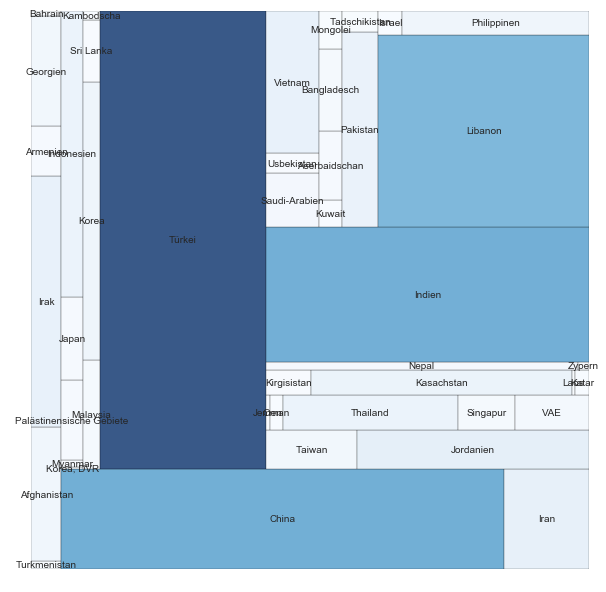

In [103]:
fig, ax = plt.subplots(figsize=(10,10))

cmap = matplotlib.cm.Blues
mini=va_ger_continent_sum['decided'].min()
maxi=va_ger_continent_sum['decided'].max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in va_ger_continent_sum['decided']]

squarify.plot(ax = ax , sizes = va_ger_continent_sum['decided'], label = va_ger_continent_sum['country'], alpha = .8, color = colors)
plt.axis('off')
plt.show()

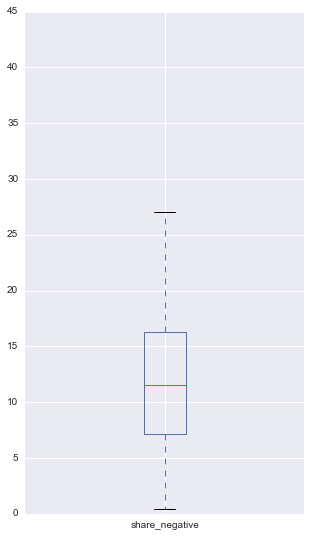

In [104]:
va_ger_continent_sum['share_negative'].plot(kind = 'box', figsize = (5,9))

In [105]:
median_continent = va_ger_continent_sum['share_negative'].median()
print("Half of all countries from the selected continent have a rejection rate that is higher than", round(median_continent),"percent.")
print("For comparison: The average rejection rate for visa applications to Germany is", int(round(average_rejection_rate_ger)), "percent.")
print("List of countries with a rejection rate higher than the average rejection rate for visas to Germany of",  int(round(average_rejection_rate_ger)), "percent:")

Half of all countries from the selected continent have a rejection rate that is higher than 12 percent.
For comparison: The average rejection rate for visa applications to Germany is 11 percent.
List of countries with a rejection rate higher than the average rejection rate for visas to Germany of 11 percent:


In [106]:
va_ger_continent_sum[va_ger_continent_sum['share_negative']>average_rejection_rate_ger].sort_values(by='share_negative')

,country,processed,decided,continent_decisions,share_total,share_total_rounded,granted,rejected,share_rejected,share_negative,share_negative_rounded,pp_difference
17,Türkei,165431,163298,671774,24.308473,24,144551,18747,11.332217,11.480239,11,0.148022
19,Jordanien,19666,19347,671774,2.879986,3,17107,2240,11.390217,11.578022,12,0.187806
16,Kambodscha,360,356,671774,0.052994,0,314,42,11.666667,11.797753,12,0.131086
36,Aserbaidschan,3501,3387,671774,0.504187,1,2985,402,11.482434,11.868911,12,0.386477
33,Usbekistan,2368,2297,671774,0.341930,0,2019,278,11.739865,12.102743,12,0.362878
5,Bahrain,385,364,671774,0.054185,0,319,45,11.688312,12.362637,12,0.674326
43,Philippinen,10035,9852,671774,1.466565,1,8539,1313,13.084205,13.327243,13,0.243038
38,Mongolei,1937,1858,671774,0.276581,0,1595,263,13.577697,14.155005,14,0.577308
20,Jemen,340,333,671774,0.049570,0,283,50,14.705882,15.015015,15,0.309133
0,Turkmenistan,519,506,671774,0.075323,0,429,77,14.836224,15.217391,15,0.381168


In [119]:
va_ger_continent_sum.sort_values(by='share_total', ascending = False)

,country,processed,decided,continent_decisions,share_total,share_total_rounded,granted,rejected,share_rejected,share_negative,share_negative_rounded,pp_difference
17,Türkei,165431,163298,671774,24.308473,24,144551,18747,11.332217,11.480239,11,0.148022
6,China,96486,95690,671774,14.244374,14,91275,4415,4.575793,4.613857,5,0.038064
31,Indien,95648,94460,671774,14.061277,14,89072,5388,5.633155,5.704002,6,0.070847
41,Libanon,88195,87113,671774,12.967605,13,79501,7612,8.630875,8.738076,9,0.107201
19,Jordanien,19666,19347,671774,2.879986,3,17107,2240,11.390217,11.578022,12,0.187806
7,Iran,19461,18340,671774,2.730085,3,15482,2858,14.685782,15.583424,16,0.897642
34,Vietnam,16835,16474,671774,2.452313,2,13568,2906,17.261657,17.639917,18,0.378260
2,Irak,16566,16411,671774,2.442935,2,14893,1518,9.163347,9.249893,9,0.086547
39,Pakistan,15518,15318,671774,2.280231,2,12764,2554,16.458306,16.673195,17,0.214888
26,Kasachstan,14329,14171,671774,2.109489,2,13577,594,4.145439,4.191659,4,0.046220


## Which are the top 15 countries of the selected continent to apply for a visa to Germany and how are the chances for each?

In [118]:
continent_top15 = va_ger_continent_sum.sort_values(by='share_total', ascending = False).head(15)
continent_top15

,country,processed,decided,continent_decisions,share_total,share_total_rounded,granted,rejected,share_rejected,share_negative,share_negative_rounded,pp_difference
17,Türkei,165431,163298,671774,24.308473,24,144551,18747,11.332217,11.480239,11,0.148022
6,China,96486,95690,671774,14.244374,14,91275,4415,4.575793,4.613857,5,0.038064
31,Indien,95648,94460,671774,14.061277,14,89072,5388,5.633155,5.704002,6,0.070847
41,Libanon,88195,87113,671774,12.967605,13,79501,7612,8.630875,8.738076,9,0.107201
19,Jordanien,19666,19347,671774,2.879986,3,17107,2240,11.390217,11.578022,12,0.187806
7,Iran,19461,18340,671774,2.730085,3,15482,2858,14.685782,15.583424,16,0.897642
34,Vietnam,16835,16474,671774,2.452313,2,13568,2906,17.261657,17.639917,18,0.378260
2,Irak,16566,16411,671774,2.442935,2,14893,1518,9.163347,9.249893,9,0.086547
39,Pakistan,15518,15318,671774,2.280231,2,12764,2554,16.458306,16.673195,17,0.214888
26,Kasachstan,14329,14171,671774,2.109489,2,13577,594,4.145439,4.191659,4,0.046220


In [116]:
top15_rejected = va_ger_continent_sum.sort_values(by='share_negative', ascending = False).head(15)
top15_rejected

,country,processed,decided,continent_decisions,share_total,share_total_rounded,granted,rejected,share_rejected,share_negative,share_negative_rounded,pp_difference
35,Kuwait,1380,1325,671774,0.197239,0,740,585,42.391304,44.150943,44,1.759639
37,Bangladesch,4090,4037,671774,0.600946,1,2944,1093,26.723716,27.074560,27,0.350844
32,Saudi-Arabien,6399,6174,671774,0.919059,1,4511,1663,25.988436,26.935536,27,0.947100
24,VAE,5745,5620,671774,0.836591,1,4184,1436,24.995648,25.551601,26,0.555953
28,Katar,829,785,671774,0.116855,0,597,188,22.677925,23.949045,24,1.271119
29,Nepal,5123,5020,671774,0.747275,1,3857,1163,22.701542,23.167331,23,0.465789
10,Palästinensische Gebiete,3819,3709,671774,0.552120,1,2922,787,20.607489,21.218657,21,0.611168
34,Vietnam,16835,16474,671774,2.452313,2,13568,2906,17.261657,17.639917,18,0.378260
15,Sri Lanka,2370,2329,671774,0.346694,0,1921,408,17.215190,17.518248,18,0.303058
25,Kirgisistan,2505,2463,671774,0.366641,0,2049,414,16.526946,16.808770,17,0.281824


**Finds:** 

    - Most applications from African countries come from
        - Turkey (24%)
        - China (14%)
        - India (14%)
        - Libanon (13%)
      follow ups are
        - Jordan (3%)
        - Iran (3%)
        - Vietnam, Iraq, Pakistan, Kasachstan, Thailand, Indonesia, Korea (each 2%)
        
    - The picture changes when looking at the share of applications rejected
        - Kuwait (44%)
        - Bangladesh (27%)
        - Saudi-Arabia (27%)
        - VAE (26%)
        - Katar (24%)
        - Nepal (23%)
        - Palestine Territories (21%)
        - Vietnam (18%)

In [108]:
possible_decisions = ['granted', 'rejected']

mosaic_continent = pd.DataFrame()

for decision_type in possible_decisions:
    temp = continent_top15[['country', decision_type]]
    temp['decision'] = decision_type
    temp = temp[['country', 'decision', decision_type]]
    temp.columns = (['country', 'decision', 'value'])
    mosaic_continent = mosaic_continent.append(temp)

In [109]:
mosaic_continent.sort_values(['country', 'decision'], ascending = [True, True], inplace = True)
mosaic_continent = mosaic_continent.reset_index()
mosaic_continent = mosaic_continent[['country', 'decision', 'value']]
mosaic_continent

,country,decision,value
0,Bangladesch,granted,2944
1,Bangladesch,rejected,1093
2,Iran,granted,15482
3,Iran,rejected,2858
4,Jemen,granted,283
5,Jemen,rejected,50
6,Katar,granted,597
7,Katar,rejected,188
8,Kirgisistan,granted,2049
9,Kirgisistan,rejected,414


In [110]:
mosaic_countries_list = []

for country in mosaic_continent['country']:
    mosaic_countries_list.append(country)
    
mosaic_country_list = set(mosaic_countries_list)
sorted(mosaic_country_list)

['Bangladesch',
 'Iran',
 'Jemen',
 'Katar',
 'Kirgisistan',
 'Kuwait',
 'Nepal',
 'Pakistan',
 'Palästinensische Gebiete',
 'Saudi-Arabien',
 'Sri Lanka',
 'Turkmenistan',
 'VAE',
 'Vietnam',
 'Zypern']

In [111]:
applications = list(product(sorted(mosaic_country_list), ['granted', 'rejected']))

index = pd.MultiIndex.from_tuples(applications, names=['country', 'decision'])

series = pd.Series([float(value) for value in mosaic_continent['value']], index = index)
series

country                   decision
Bangladesch               granted      2944.0
                          rejected     1093.0
Iran                      granted     15482.0
                          rejected     2858.0
Jemen                     granted       283.0
                          rejected       50.0
Katar                     granted       597.0
                          rejected      188.0
Kirgisistan               granted      2049.0
                          rejected      414.0
Kuwait                    granted       740.0
                          rejected      585.0
Nepal                     granted      3857.0
                          rejected     1163.0
Pakistan                  granted     12764.0
                          rejected     2554.0
Palästinensische Gebiete  granted      2922.0
                          rejected      787.0
Saudi-Arabien             granted      4511.0
                          rejected     1663.0
Sri Lanka                 granted      1921.0

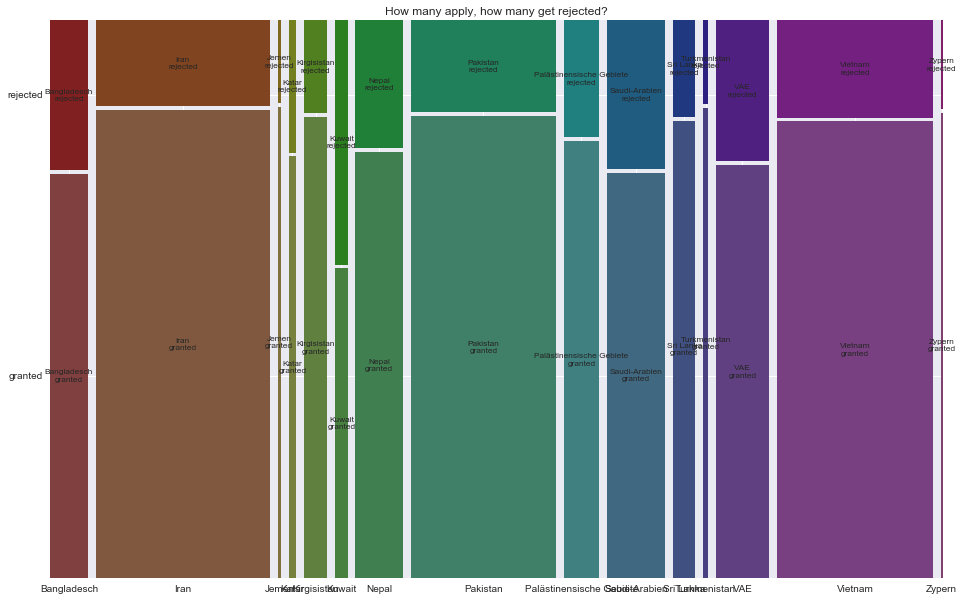

In [112]:
fig, ax = plt.subplots(figsize = (16,10))

mosaic(series, gap=0.01, title='How many apply, how many get rejected?', ax = ax)
plt.savefig('visuals/drafts/marimekko-'+selected_continent+'.pdf', transparent = True)
plt.show()

## Repeating above analysis for countries part of the DW ASIA region

In [124]:
dw_regional = pd.read_csv("data/input/Asien-Visa-Applications-2014to2017-dw-regional.csv")

In [132]:
dw_asia = dw_regional[dw_regional['DW_Asia']==True]
dw_asia['dw_asia_decisions'] = dw_asia['decided'].sum()
dw_asia['dw_share_total'] = dw_asia['decided']/dw_asia['dw_asia_decisions']*100
dw_asia['dw_share_total_rounded'] = round(dw_asia['decided']/dw_asia['dw_asia_decisions']*100)
dw_asia['dw_share_negative'] = round(dw_asia['rejected']/dw_asia['decided']*100)
dw_asia.sort_values(by='share_total', ascending = False)

,country,processed,decided,continent_decisions,share_total,share_total_rounded,granted,rejected,share_negative,share_negative_rounded,DW_Asia,dw_asia_decisions,dw_share_total,dw_share_total_rounded,dw_share_negative
1,China,96486,95690,671774,14.244374,14,91275,4415,4.613857,5,True,351054,27.257915,27.0,5.0
2,Indien,95648,94460,671774,14.061277,14,89072,5388,5.704002,6,True,351054,26.907541,27.0,6.0
5,Iran,19461,18340,671774,2.730085,3,15482,2858,15.583424,16,True,351054,5.224267,5.0,16.0
6,Vietnam,16835,16474,671774,2.452313,2,13568,2906,17.639917,18,True,351054,4.692725,5.0,18.0
8,Pakistan,15518,15318,671774,2.280231,2,12764,2554,16.673195,17,True,351054,4.363431,4.0,17.0
9,Kasachstan,14329,14171,671774,2.109489,2,13577,594,4.191659,4,True,351054,4.036701,4.0,4.0
10,Thailand,13448,13310,671774,1.981321,2,12469,841,6.318557,6,True,351054,3.791439,4.0,6.0
11,Indonesien,13360,13199,671774,1.964798,2,12217,982,7.439958,7,True,351054,3.759820,4.0,7.0
12,Korea,10693,10501,671774,1.563175,2,10445,56,0.533283,1,True,351054,2.991278,3.0,1.0
13,Philippinen,10035,9852,671774,1.466565,1,8539,1313,13.327243,13,True,351054,2.806406,3.0,13.0


In [133]:
dw_asia.to_csv('data/output/DW-Asia-Visa-applications.csv')

In [135]:
possible_decisions = ['granted', 'rejected']

mosaic_dw_asia = pd.DataFrame()

for decision_type in possible_decisions:
    temp = dw_asia[['country', decision_type]]
    temp['decision'] = decision_type
    temp = temp[['country', 'decision', decision_type]]
    temp.columns = (['country', 'decision', 'value'])
    mosaic_dw_asia = mosaic_dw_asia.append(temp)

In [136]:
mosaic_dw_asia.sort_values(['country', 'decision'], ascending = [True, True], inplace = True)
mosaic_dw_asia = mosaic_dw_asia.reset_index()
mosaic_dw_asia = mosaic_dw_asia[['country', 'decision', 'value']]
mosaic_dw_asia

,country,decision,value
0,Afghanistan,granted,7831
1,Afghanistan,rejected,915
2,Bangladesch,granted,2944
3,Bangladesch,rejected,1093
4,China,granted,91275
5,China,rejected,4415
6,Indien,granted,89072
7,Indien,rejected,5388
8,Indonesien,granted,12217
9,Indonesien,rejected,982


In [137]:
mosaic_dw_asia_list = []

for country in mosaic_dw_asia['country']:
    mosaic_dw_asia_list.append(country)
    
mosaic_dw_asia_country_list = set(mosaic_dw_asia_list)
sorted(mosaic_dw_asia_country_list)

['Afghanistan',
 'Bangladesch',
 'China',
 'Indien',
 'Indonesien',
 'Iran',
 'Japan',
 'Kambodscha',
 'Kasachstan',
 'Kirgisistan',
 'Korea',
 'Korea, DVR',
 'Laos',
 'Malaysia',
 'Mongolei',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Philippinen',
 'Singapur',
 'Sri Lanka',
 'Tadschikistan',
 'Taiwan',
 'Thailand',
 'Turkmenistan',
 'Usbekistan',
 'Vietnam']

In [139]:
applications_dw_asia = list(product(sorted(mosaic_dw_asia_country_list), ['granted', 'rejected']))

index_dw_asia = pd.MultiIndex.from_tuples(applications_dw_asia, names=['country', 'decision'])

series_dw_asia = pd.Series([float(value) for value in mosaic_dw_asia['value']], index = index_dw_asia)
series_dw_asia

country        decision
Afghanistan    granted      7831.0
               rejected      915.0
Bangladesch    granted      2944.0
               rejected     1093.0
China          granted     91275.0
               rejected     4415.0
Indien         granted     89072.0
               rejected     5388.0
Indonesien     granted     12217.0
               rejected      982.0
Iran           granted     15482.0
               rejected     2858.0
Japan          granted      3816.0
               rejected       15.0
Kambodscha     granted       314.0
               rejected       42.0
Kasachstan     granted     13577.0
               rejected      594.0
Kirgisistan    granted      2049.0
               rejected      414.0
Korea          granted     10445.0
               rejected       56.0
Korea, DVR     granted        58.0
               rejected        7.0
Laos           granted       125.0
               rejected        4.0
Malaysia       granted      3864.0
               rejected      25

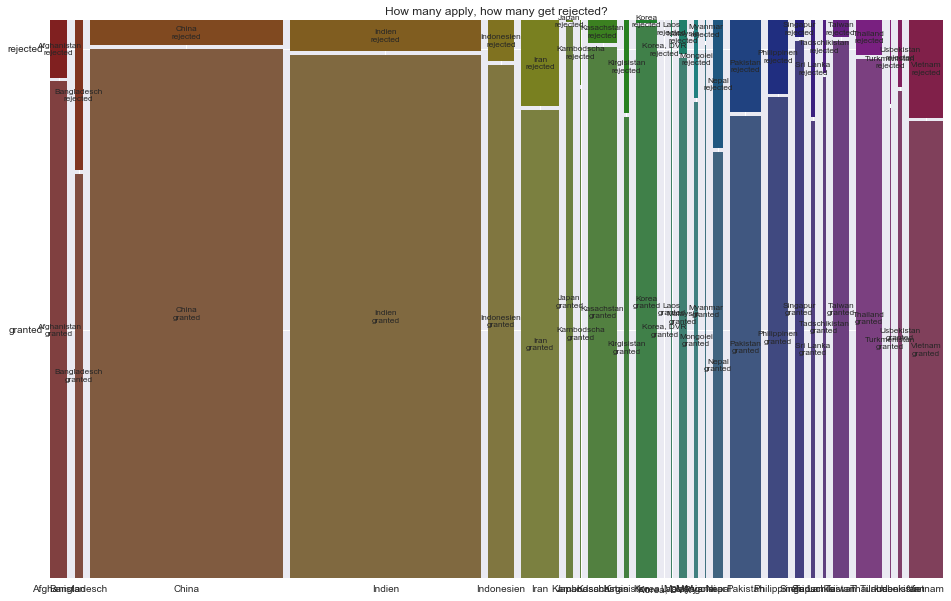

In [140]:
fig, ax = plt.subplots(figsize = (16,10))

mosaic(series_dw_asia, gap=0.01, title='How many apply, how many get rejected?', ax = ax)
plt.savefig('visuals/drafts/marimekko-dw_asia.pdf', transparent = True)
plt.show()

In [126]:
dw_mideast = dw_regional[dw_regional['DW_Asia']==False]
dw_mideast

,country,processed,decided,continent_decisions,share_total,share_total_rounded,granted,rejected,share_negative,share_negative_rounded,DW_Asia
0,Türkei,165431,163298,671774,24.308473,24,144551,18747,11.480239,11,False
3,Libanon,88195,87113,671774,12.967605,13,79501,7612,8.738076,9,False
4,Jordanien,19666,19347,671774,2.879986,3,17107,2240,11.578022,12,False
7,Irak,16566,16411,671774,2.442935,2,14893,1518,9.249893,9,False
16,Georgien,7276,7194,671774,1.070896,1,6484,710,9.869336,10,False
17,Saudi-Arabien,6399,6174,671774,0.919059,1,4511,1663,26.935536,27,False
18,VAE,5745,5620,671774,0.836591,1,4184,1436,25.551601,26,False
24,Palästinensische Gebiete,3819,3709,671774,0.552120,1,2922,787,21.218657,21,False
25,Aserbaidschan,3501,3387,671774,0.504187,1,2985,402,11.868911,12,False
26,Armenien,3371,3263,671774,0.485729,0,2943,320,9.806926,10,False
